In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
cch2 = pd.read_csv("continental_US_CCH2/full_dataset.csv")
len(cch2)

/home/jackson/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,26,28,29,42,43,44,50,56,65,67,73,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/jackson/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1549986, 1651103)

In [11]:
bioinf_prelim = pd.read_csv("Bioinformatics_Prelim_research.csv", usecols=["Species","FCA protein link:"])
species_of_interest = list(bioinf_prelim.loc[~bioinf_prelim["FCA protein link:"].isna(),"Species"])
species_of_interest, len(species_of_interest)

(['Selaginella moellendorffii',
  'Glycine max',
  'Vitis vinifera',
  'Amborella trichopoda',
  'Citrus sinensis',
  'Gossypium arboreum',
  'Gossypium raimondii',
  'Phaseolus angularis',
  'Lactuca sativa',
  'Citrus unshiu',
  'Trema orientale',
  'Artemisia annua',
  'Cuscuta australis',
  'Prunus yedoensis var. nudiflora',
  'Chara braunii',
  'Cinnamomum micranthum f. kanehirae',
  'Glycine soja',
  'Arachis hypogaea',
  'Vigna angularis var. angularis',
  'Mikania micrantha',
  'Salix brachista',
  'Prunus dulcis',
  'Hibiscus syriacus',
  'Lupinus albus',
  'Hevea brasiliensis',
  'Cuscuta campestris',
  'Lolium perenne',
  'Triticum aestivum',
  'Mimulus guttatus',
  'Erythranthe guttata',
  'Brassica oleraceae',
  'Zostera marina',
  'Arabidopsis lyrata subsp. lyrata',
  'Cynara cardunculus',
  'Anthurium anthicola',
  'Cicer arietinum',
  'Nicotiana sylvestris',
  'Gossypium hirsutum',
  'Helianthus annuus',
  'Capsicum baccatum',
  'Capsicum annuum',
  'Aquilegia caerulea'

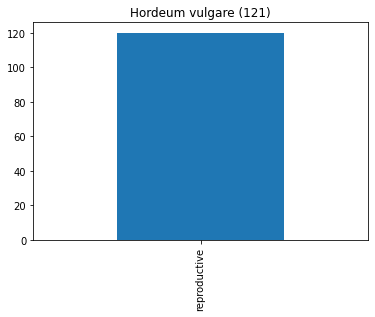

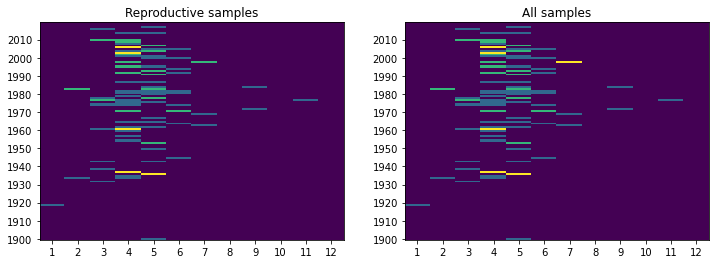

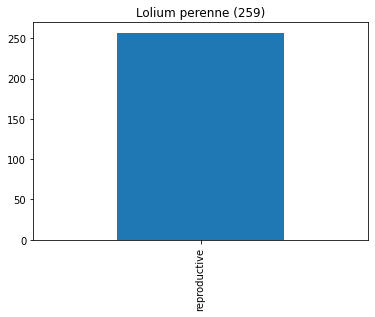

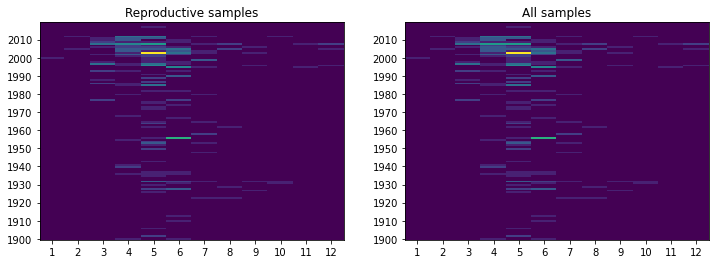

In [12]:
# Check out the grasses:
# Considering "reproductive"=True and see if the distribution
# is peaked or flat over the year
# "Hordeum vulgare" 
# "Lolium perenne"
for sp in ["Hordeum vulgare", "Lolium perenne"]:
    subset = cch2.loc[(cch2["scientificName"].str.lower()==sp.lower())&(~cch2["year"].isna())&(~cch2["month"].isna())&(~cch2["reproductive"].isna())]
    subset[["reproductive"]].sum(axis=0).plot.bar(title="{} ({})".format(sp, len(subset)))
    plt.show()

    _, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

    by_time = pd.crosstab(subset.loc[subset["reproductive"], "year"].astype(int), subset.loc[subset["reproductive"], "month"].astype(int))
    by_time = by_time.reindex(index=range(1900, 2020), columns=range(1, 13)).fillna(0)
    subsampled_index = range(1900, 2020, 10)
    ax1.pcolor(by_time)
    ax1.set_title("Reproductive samples")
    ax1.set_yticks(np.arange(0.5, len(subsampled_index)*10, 10))
    ax1.set_yticklabels(subsampled_index)
    ax1.set_xticks(np.arange(0.5, len(by_time.columns), 1))
    ax1.set_xticklabels(by_time.columns)

    by_time = pd.crosstab(subset["year"].astype(int), subset["month"].astype(int))
    by_time = by_time.reindex(index=range(1900, 2020), columns=range(1, 13)).fillna(0)
    ax2.pcolor(by_time)
    ax2.set_title("All samples")
    ax2.set_yticks(np.arange(0.5, len(subsampled_index)*10, 10))
    ax2.set_yticklabels(subsampled_index)
    ax2.set_xticks(np.arange(0.5, len(by_time.columns), 1))
    ax2.set_xticklabels(by_time.columns)
    plt.show()

In [13]:
from IPython.display import display, HTML
nulls = None

for sp in species_of_interest:
    subset = cch2.loc[(cch2["scientificName"].str.lower()==sp.lower()),
                      ["year", "startDayOfYear", "flowering", "institutionCode"]]
    if len(subset) < 100 :
        continue
    n_fl = (subset["flowering"] == True).sum()
    n_nfl = (subset["flowering"] == False).sum()
    n_null = (subset["flowering"].isna()).sum()
    null_by_inst = subset[["institutionCode", "flowering"]]
    null_by_inst["flowering"] = null_by_inst["flowering"].isna()
    null_by_inst = null_by_inst.groupby("institutionCode").sum().sort_values(ascending=False,
                                                                             by="flowering")
    null_by_inst = null_by_inst.loc[null_by_inst["flowering"] > 0]
    if nulls is None:
        nulls = null_by_inst
    else:
        nulls = nulls.add(null_by_inst, fill_value=0)
    percent_labeled = 1.0 - (n_null/len(subset))
    print("Species: {} ({} total, {} fl, {} not fl, {} null, {:.2f}% labeled)".format(sp,
                                                                     len(subset),
                                                                     n_fl,
                                                                     n_nfl,
                                                                     n_null,
                                                                     percent_labeled*100))
    print(null_by_inst)
print(nulls)

<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Cuscuta campestris (179 total, 113 fl, 4 not fl, 62 null, 65.36% labeled)
                 flowering
institutionCode           
DAV                     21
CHSC                    20
RSA                      8
SBBG                     6
HSC                      3
UCJEPS                   2
CDA                      1
OBI                      1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Lolium perenne (494 total, 238 fl, 39 not fl, 217 null, 56.07% labeled)
                 flowering
institutionCode           
HSC                     63
DAV                     54
RSA                     27
CHSC                    21
CAS                     11
IRVC                    11
UCSB                     5
YM                       5
JROH                     3
UCJEPS                   3
CLARK                    3
CSUSB                    2
SBBG                     2
UCSC                     2
HREC                     1
POM                      1
SHTC                     1
THRI                     1
LA                       1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Triticum aestivum (324 total, 84 fl, 134 not fl, 106 null, 67.28% labeled)
                 flowering
institutionCode           
DAV                     22
CHSC                    16
UCSB                    14
OBI                     11
HSC                      9
RSA                      8
CDA                      6
CAS                      5
SBBG                     3
IRVC                     3
UCJEPS                   2
YM                       2
CATA                     1
SJSU                     1
POM                      1
JROH                     1
UCSC                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Mimulus guttatus (1251 total, 900 fl, 12 not fl, 339 null, 72.90% labeled)
                 flowering
institutionCode           
UCSB                    65
LA                      61
HSC                     55
RSA                     30
CSUSB                   18
IRVC                    14
YM                      14
CDA                     13
CLARK                    9
CHSC                     9
UCJEPS                   9
DAV                      8
UCSC                     7
SHTC                     6
SBBG                     4
THRI                     3
PGM                      2
VVC                      2
BFRS                     2
HREC                     2
OBI                      1
CAS                      1
BLMAR                    1
JROH                     1
SJSU                     1
CATA                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Erythranthe guttata (943 total, 529 fl, 16 not fl, 398 null, 57.79% labeled)
                 flowering
institutionCode           
CHSC                   151
CAS                     66
SBBG                    41
DAV                     33
OBI                     22
SDSU                    17
SJSU                    14
RSA                     14
LOB                     12
PPWD                    10
SHTC                     6
LA                       3
UCSB                     2
BSCA                     2
POM                      2
SPIF                     1
CATA                     1
UCSC                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Zostera marina (184 total, 116 fl, 32 not fl, 36 null, 80.43% labeled)
                 flowering
institutionCode           
SBBG                    17
HSC                      5
UCSB                     5
OBI                      2
RSA                      2
CHSC                     1
DAV                      1
SDSU                     1
SFV                      1
UCJEPS                   1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Cynara cardunculus (135 total, 69 fl, 21 not fl, 45 null, 66.67% labeled)
                 flowering
institutionCode           
OBI                     10
SDSU                     6
DAV                      5
UCSB                     5
CAS                      4
UCJEPS                   4
CATA                     3
CDA                      3
IRVC                     3
SBBG                     2


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Helianthus annuus (560 total, 449 fl, 14 not fl, 97 null, 82.68% labeled)
                 flowering
institutionCode           
CHSC                    21
CSUSB                   11
CAS                     10
SDSU                     8
RSA                      7
SBBG                     7
SHTC                     5
HSC                      4
LOB                      4
OBI                      4
CLARK                    3
DAV                      3
CDA                      2
UCSB                     2
UCJEPS                   1
UCSC                     1
VVC                      1
SJSU                     1
YM                       1
IRVC                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Trifolium pratense (216 total, 152 fl, 5 not fl, 59 null, 72.69% labeled)
                 flowering
institutionCode           
CHSC                    19
DAV                     17
YM                       4
RSA                      4
SDSU                     3
SHTC                     3
CAS                      2
SJSU                     2
UCSB                     1
UCJEPS                   1
BFRS                     1
OBI                      1
CDA                      1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Trifolium subterraneum (130 total, 48 fl, 0 not fl, 82 null, 36.92% labeled)
                 flowering
institutionCode           
CHSC                    25
DAV                     18
JROH                    11
OBI                     11
HSC                      3
CDA                      3
PPWD                     3
CAS                      2
RSA                      2
SJSU                     2
PGM                      1
HREC                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Nicotiana attenuata (490 total, 376 fl, 13 not fl, 101 null, 79.39% labeled)
                 flowering
institutionCode           
RSA                     21
CHSC                    18
DAV                     13
UCJEPS                   9
CAS                      8
SBBG                     6
YM                       4
HSC                      4
SDSU                     3
OBI                      2
SJSU                     2
LOB                      2
IRVC                     2
CDA                      2
SPIF                     2
VVC                      1
CSUSB                    1
CLARK                    1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Populus trichocarpa (503 total, 55 fl, 202 not fl, 246 null, 51.09% labeled)
                 flowering
institutionCode           
CAS                     57
DAV                     29
HSC                     29
RSA                     19
OBI                     18
CHSC                    14
SBBG                    14
UCSB                    13
LA                      10
CLARK                    5
JROH                     5
UCJEPS                   4
SDSU                     4
POM                      4
LOB                      4
SJSU                     3
CATA                     2
IRVC                     2
CDA                      2
UCSC                     2
PGM                      1
SCFS                     1
FSC                      1
UCR                      1
VVC                      1
YM                       1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Raphanus sativus (768 total, 570 fl, 16 not fl, 182 null, 76.30% labeled)
                 flowering
institutionCode           
UCSB                    47
UCSC                    30
CAS                     23
SDSU                    23
SBBG                    12
HSC                      8
CHSC                     7
CDA                      6
SHTC                     6
CLARK                    5
RSA                      3
LA                       2
YM                       2
DAV                      2
CSUSB                    2
CATA                     1
JROH                     1
IRVC                     1
HREC                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Raphanus sativus (768 total, 570 fl, 16 not fl, 182 null, 76.30% labeled)
                 flowering
institutionCode           
UCSB                    47
UCSC                    30
CAS                     23
SDSU                    23
SBBG                    12
HSC                      8
CHSC                     7
CDA                      6
SHTC                     6
CLARK                    5
RSA                      3
LA                       2
YM                       2
DAV                      2
CSUSB                    2
CATA                     1
JROH                     1
IRVC                     1
HREC                     1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Brassica rapa (477 total, 357 fl, 15 not fl, 105 null, 77.99% labeled)
                 flowering
institutionCode           
CAS                     19
HSC                     11
JROH                    10
SDSU                     9
CDA                      9
SHTC                     8
UCSC                     7
RSA                      5
MACF                     4
SBBG                     4
DAV                      3
LA                       3
UCJEPS                   2
CHSC                     2
SJSU                     1
VVC                      1
OBI                      1
YM                       1
SD                       1
IRVC                     1
HREC                     1
CSUSB                    1
CLARK                    1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Hordeum vulgare (233 total, 65 fl, 62 not fl, 106 null, 54.51% labeled)
                 flowering
institutionCode           
DAV                     19
UCSB                    17
HSC                     13
OBI                     13
CHSC                    11
CAS                      8
SBBG                     6
SDSU                     5
RSA                      3
LA                       2
CATA                     2
POM                      1
UCSC                     1
PGM                      1
LOB                      1
CSUSB                    1
CDA                      1
VVC                      1


<ipython-input-13-7fce5a97f8d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_by_inst["flowering"] = null_by_inst["flowering"].isna()


Species: Ricinus communis (354 total, 190 fl, 76 not fl, 88 null, 75.14% labeled)
                 flowering
institutionCode           
RSA                     11
SDSU                    10
IRVC                     8
LOB                      8
CHSC                     7
DAV                      7
SD                       7
SBBG                     6
CAS                      4
CATA                     4
UCJEPS                   3
UCR                      2
OBI                      2
LA                       2
CSUSB                    2
CLARK                    2
PASA                     1
HSC                      1
CDA                      1
                 flowering
institutionCode           
BFRS                   3.0
BLMAR                  1.0
BSCA                   2.0
CAS                  243.0
CATA                  16.0
CDA                   56.0
CHSC                 349.0
CLARK                 34.0
CSUSB                 40.0
DAV                  257.0
FSC                    1.0


In [14]:
nulls.sort_values(ascending=False,by="flowering")

,flowering
institutionCode,
CHSC,349.0
DAV,257.0
CAS,243.0
UCSB,223.0
HSC,216.0
RSA,167.0
SBBG,142.0
SDSU,112.0
OBI,99.0
